### Malignant-Comment-Classifier

In [25]:
#importing required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [26]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [27]:
#reading data 
data = pd.read_csv("/content/drive/MyDrive/train.csv")

In [28]:
data

,id,comment_text,malignant,highly_malignant,rude,threat,abuse,loathe
0,0000997932d777bf,Explanation\nWhy the edits made under my usern...,0,0,0,0,0,0
1,000103f0d9cfb60f,D'aww! He matches this background colour I'm s...,0,0,0,0,0,0
2,000113f07ec002fd,"Hey man, I'm really not trying to edit war. It...",0,0,0,0,0,0
3,0001b41b1c6bb37e,"""\nMore\nI can't make any real suggestions on ...",0,0,0,0,0,0
4,0001d958c54c6e35,"You, sir, are my hero. Any chance you remember...",0,0,0,0,0,0
...,...,...,...,...,...,...,...,...
159566,ffe987279560d7ff,""":::::And for the second time of asking, when ...",0,0,0,0,0,0
159567,ffea4adeee384e90,You should be ashamed of yourself \n\nThat is ...,0,0,0,0,0,0
159568,ffee36eab5c267c9,"Spitzer \n\nUmm, theres no actual article for ...",0,0,0,0,0,0
159569,fff125370e4aaaf3,And it looks like it was actually you who put ...,0,0,0,0,0,0


In [29]:
data.describe()

,malignant,highly_malignant,rude,threat,abuse,loathe
count,159571.000000,159571.000000,159571.000000,159571.000000,159571.000000,159571.000000
mean,0.095844,0.009996,0.052948,0.002996,0.049364,0.008805
std,0.294379,0.099477,0.223931,0.054650,0.216627,0.093420
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [30]:
data.isnull().sum()

id                  0
comment_text        0
malignant           0
highly_malignant    0
rude                0
threat              0
abuse               0
loathe              0
dtype: int64

In [31]:
#no null values

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


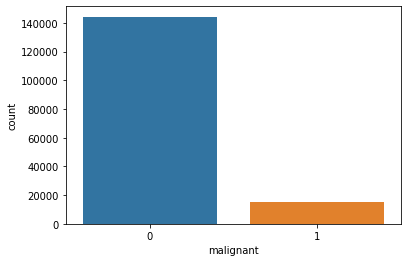

In [32]:
sns.countplot(data["malignant"])

In [33]:
#most of the messages are not malignant

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


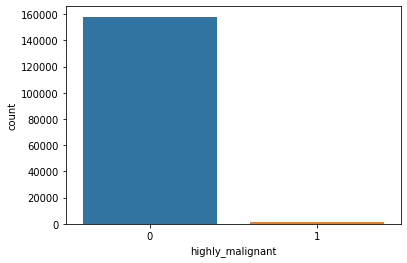

In [34]:
sns.countplot(data["highly_malignant"])

In [35]:
#most of the messages are not highly malignant

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


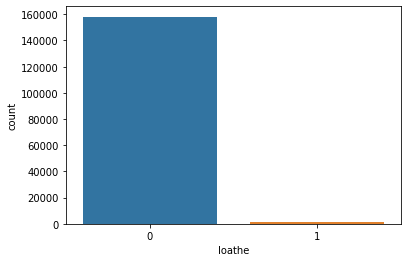

In [36]:
sns.countplot(data["loathe"])

In [37]:
#most of the messages in the training dataset are not loathe

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


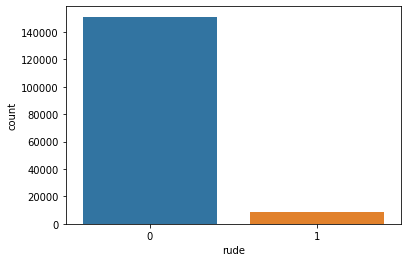

In [38]:
sns.countplot(data["rude"])

In [39]:
#most of the messages in the training dataset are not rude

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


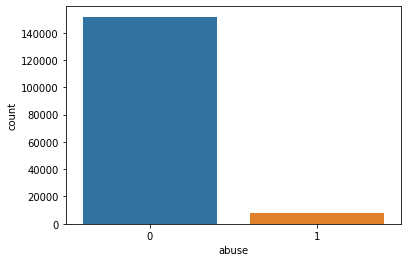

In [40]:
sns.countplot(data["abuse"])

In [41]:
#most of the messages in the training dataset are not abuse

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


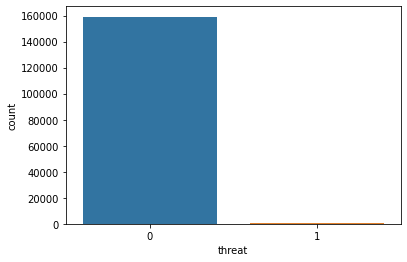

In [42]:
sns.countplot(data["threat"])

In [43]:
#data is imbalanced

In [55]:
import nltk
nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.


True

In [56]:
from nltk.stem import WordNetLemmatizer
from nltk.corpus import  stopwords
import re

In [57]:
data['c_length'] = data['comment_text'].str.len()
data['w_length'] = data['comment_text'].apply(lambda x:len(x.split()) )

In [58]:
data.head()

,id,comment_text,malignant,highly_malignant,rude,threat,abuse,loathe,c_length,w_length
0,0000997932d777bf,Explanation\nWhy the edits made under my usern...,0,0,0,0,0,0,264,43
1,000103f0d9cfb60f,D'aww! He matches this background colour I'm s...,0,0,0,0,0,0,112,17
2,000113f07ec002fd,"Hey man, I'm really not trying to edit war. It...",0,0,0,0,0,0,233,42
3,0001b41b1c6bb37e,"""\nMore\nI can't make any real suggestions on ...",0,0,0,0,0,0,622,113
4,0001d958c54c6e35,"You, sir, are my hero. Any chance you remember...",0,0,0,0,0,0,67,13


In [59]:
stop_words = set(stopwords.words('english'))

In [60]:
for i in range(0, len(data)):
    c_text = re.sub("[^a-zA-Z]", " ", data["comment_text"][i])
    c_text = c_text.lower()
    c_text = c_text.split()
    c_text = [WordNetLemmatizer().lemmatize(word) for word in c_text if word not in stop_words]
    c_text = " ".join(c_text)
    data["comment_text"][i] = c_text

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys


In [61]:
data['c_af_length'] = data['comment_text'].str.len()
data['w_af_length'] = data['comment_text'].apply(lambda x:len(x.split()) )
data = data.drop("id", axis=1)
data['bad_intensity'] =data[["malignant", "highly_malignant", "rude", "threat", "abuse", "loathe"]].sum(axis =1)

In [62]:
data[40:50]

,comment_text,malignant,highly_malignant,rude,threat,abuse,loathe,c_length,w_length,c_af_length,w_af_length,bad_intensity
40,sure lead must briefly summarize armenia histo...,0,0,0,0,0,0,216,38,145,21,0
41,tfd think eced think responded without seeing ...,0,0,0,0,0,0,198,33,121,20,0
42,gay antisemmitian archangel white tiger meow g...,1,0,1,0,1,1,648,117,394,61,4
43,fuck filthy mother as dry,1,0,1,0,1,0,40,8,25,5,3
44,sorry sorry screwed around someone talk page b...,1,0,0,0,0,0,319,56,152,24,1
45,believe lisak criticism present conforms npv r...,0,0,0,0,0,0,813,138,529,71,0
46,point ammended appropriate encyclopedic notabi...,0,0,0,0,0,0,93,12,63,6,0
47,word lazy actually point anything change appro...,0,0,0,0,0,0,109,19,56,9,0
48,claim stalking absolute rubbish serf aggravate...,0,0,0,0,0,0,696,121,424,59,0
49,jmabel regard predominant scholary consensus a...,0,0,0,0,0,0,1180,198,802,109,0


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


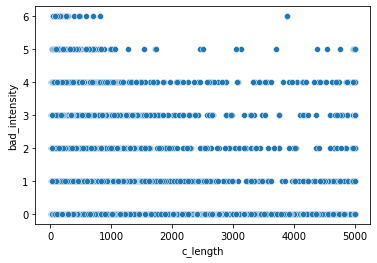

In [63]:
sns.scatterplot(data.c_length, data.bad_intensity)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


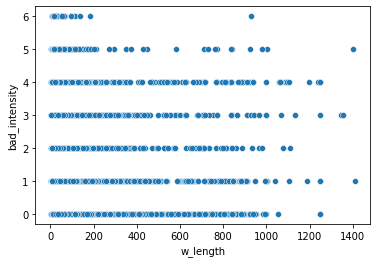

In [64]:
sns.scatterplot(data.w_length, data.bad_intensity)

In [65]:
#high bad comments contain less number of words

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


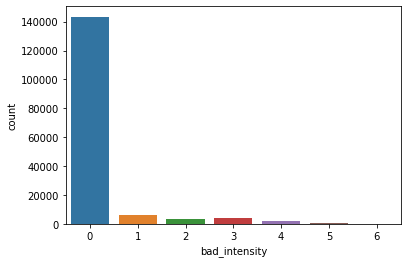

In [66]:
sns.countplot(data.bad_intensity)

In [67]:
#most of the comments are not bad

In [68]:
from sklearn.feature_extraction.text import TfidfVectorizer
tf_vec = TfidfVectorizer(max_features = 3000, stop_words='english')
features = tf_vec.fit_transform(data['comment_text'])
x = features
y = data.iloc[:,1:7].to_numpy()

In [69]:
x

<159571x3000 sparse matrix of type '<class 'numpy.float64'>'
	with 2825101 stored elements in Compressed Sparse Row format>

In [70]:
from sklearn.model_selection import train_test_split

In [71]:
X_train,X_test,y_train,y_test=train_test_split(x, y, test_size=.30, random_state=56)

In [72]:
pip install scikit-multilearn

     |████████████████████████████████| 89 kB 7.0 MB/s 


In [73]:
from skmultilearn.problem_transform import BinaryRelevance
from sklearn.naive_bayes import GaussianNB

In [74]:
# initialize binary relevance multi-label classifier
# with a gaussian naive bayes base classifier
br = BinaryRelevance(GaussianNB())

# train
br.fit(X_train, y_train)

# predict
predictions = br.predict(X_test)

In [75]:
predictions.toarray()

array([[1, 1, 1, 0, 1, 1],
       [1, 1, 1, 1, 1, 1],
       [0, 0, 0, 0, 0, 0],
       ...,
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0]], dtype=int64)

In [76]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,predictions)

0.4964697526737968

In [77]:
# using classifier chains
from skmultilearn.problem_transform import ClassifierChain
from sklearn.naive_bayes import GaussianNB

# initialize classifier chains multi-label classifier
# with a gaussian naive bayes base classifier
gn = ClassifierChain(GaussianNB())

# train
gn.fit(X_train, y_train)

# predict
predictions2 = gn.predict(X_test)

accuracy_score(y_test,predictions2)

0.5180690173796791

In [78]:
# using Label Powerset
from skmultilearn.problem_transform import LabelPowerset
from sklearn.naive_bayes import GaussianNB

# initialize Label Powerset multi-label classifier
# with a gaussian naive bayes base classifier
lbl = LabelPowerset(GaussianNB())

# train
lbl.fit(X_train, y_train)

# predict
predictions3 = lbl.predict(X_test)

accuracy_score(y_test,predictions3)

0.37034174465240643

In [79]:
from skmultilearn.adapt import MLkNN

ml = MLkNN(k=20)

# train
ml.fit(X_train, y_train)

# predict
predictions4 = ml.predict(X_test)

accuracy_score(y_test,predictions4)

0.9022810828877005

In [80]:
# MLkNN is the best model

In [81]:
import joblib

In [82]:
joblib.dump(ml, "malignant.obj")
joblib.dump(tf_vec, "vectorizer.obj")

['vectorizer.obj']

In [83]:
test_data = pd.read_csv("/content/drive/MyDrive/test.csv")

In [84]:
test_data

,id,comment_text
0,00001cee341fdb12,Yo bitch Ja Rule is more succesful then you'll...
1,0000247867823ef7,== From RfC == \n\n The title is fine as it is...
2,00013b17ad220c46,""" \n\n == Sources == \n\n * Zawe Ashton on Lap..."
3,00017563c3f7919a,":If you have a look back at the source, the in..."
4,00017695ad8997eb,I don't anonymously edit articles at all.
...,...,...
153159,fffcd0960ee309b5,". \n i totally agree, this stuff is nothing bu..."
153160,fffd7a9a6eb32c16,== Throw from out field to home plate. == \n\n...
153161,fffda9e8d6fafa9e,""" \n\n == Okinotorishima categories == \n\n I ..."
153162,fffe8f1340a79fc2,""" \n\n == """"One of the founding nations of the..."


In [85]:
test_data.isnull().sum()

id              0
comment_text    0
dtype: int64

In [86]:
for i in range(0, len(test_data)):
    c_text = re.sub("[^a-zA-Z]", " ", test_data["comment_text"][i])
    c_text = c_text.lower()
    c_text = c_text.split()
    c_text = [WordNetLemmatizer().lemmatize(word) for word in c_text if word not in stop_words]
    c_text = " ".join(c_text)
    test_data["comment_text"][i] = c_text

In [87]:
features = tf_vec.transform(test_data['comment_text'])

In [88]:
y_pred_tdata = ml.predict(features)

In [89]:
y_pred_tdata = pd.DataFrame(y_pred_tdata.toarray())

In [90]:
y_pred_tdata

,0,1,2,3,4,5
0,0,0,0,0,0,0
1,0,0,0,0,0,0
2,0,0,0,0,0,0
3,0,0,0,0,0,0
4,0,0,0,0,0,0
...,...,...,...,...,...,...
153159,0,0,0,0,0,0
153160,0,0,0,0,0,0
153161,0,0,0,0,0,0
153162,0,0,0,0,0,0


In [91]:
test_data2 = pd.concat([test_data, y_pred_tdata], axis=1)

In [92]:
test_data2.columns = ["id", "comment_text", "malignant", "highly_malignant",\
                                               "rude", "threat", "abuse", "loathe"]

In [93]:
test_data2

,id,comment_text,malignant,highly_malignant,rude,threat,abuse,loathe
0,00001cee341fdb12,yo bitch ja rule succesful ever whats hating s...,0,0,0,0,0,0
1,0000247867823ef7,rfc title fine imo,0,0,0,0,0,0
2,00013b17ad220c46,source zawe ashton lapland,0,0,0,0,0,0
3,00017563c3f7919a,look back source information updated correct f...,0,0,0,0,0,0
4,00017695ad8997eb,anonymously edit article,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...
153159,fffcd0960ee309b5,totally agree stuff nothing long crap,0,0,0,0,0,0
153160,fffd7a9a6eb32c16,throw field home plate get faster throwing cut...,0,0,0,0,0,0
153161,fffda9e8d6fafa9e,okinotorishima category see change agree corre...,0,0,0,0,0,0
153162,fffe8f1340a79fc2,one founding nation eu germany law return quit...,0,0,0,0,0,0


In [94]:
test_data2.to_csv("test_output.csv")